In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt

tfd = tfp.distributions

Often we will want to summarize other aspects of a posterior distribution. For example, we may want to calculate $Pr(\theta \in A |y_{1},...,y_{n})$ for arbitrary sets A. Alternatively, we may be interested in means and standard deviations of some function of $\theta$, or the predictive distribution of missing or unobserved data. When comparing two or more populations we may be interested in the posterior distribution of $|\theta_{1} - \theta_{2}|$, $\frac{\theta_{1}}{\theta_{2}}$ or $max(\theta_{1},...,\theta_{m})$, all of which are functions of more than one parameter. Obtaining exact values for these posterior quantities can be difficult or impossible, but if we can generate random sample values from the parameters from their posterior distributions, then all of these posterior quantities of interest can be approximated to an arbitrary degree of precision using the Monte Carlo method.

## The Monte Carlo method

In the last chapter we obtained the following posterior distributions for birthrates of women without and with bachelor's degrees, respectively:

$$ p(\theta_{1}| \sum_{i=1}^{111} Y_{i,1} = 217) = gamma(\theta, 219, 112)$$
$$ p(\theta_{2}| \sum_{i=1}^{44} Y_{i,2} = 66) = gamma(\theta, 68, 45)$$

Additionally, we modeled $\theta_{1}$ and $\theta_{2}$ as conditionally independent given the data. It was claimed that $Pr(\theta_{1} > \theta_{2} | \sum Y_{i,1} = 217, \sum Y_{i,2} = 66) = 0.97$ How was this probability calculated?

$$Pr(\theta_{1} > \theta_{2} | y_{1,1}, ..., y_{n2, 2}) = \int_{0}^{inf} \int_{0}^{\theta_{1}} p(\theta_{1}, \theta_{2} | y_{1,1},...,y_{n2,2}) d\theta_{2}d\theta_{1} = \int_{0}^{inf} \int_{0}^{\theta_{1}} gamma(219,112) gamma(68, 45) d\theta_{2}d\theta_{1} = \frac{112^{219}45^{68}}{\Gamma(219)\Gamma(68)} \int_{0}^{inf} \int_{0}^{\theta_{1}} \theta_{1}^{218}\theta_{2}^{67}e^{-112\theta_{1}-45\theta_{2}} d\theta_{2}d\theta_{1}$$

There are a variety of ways to calculate this integral. It can be done with pencil and paper, and it can be calculated numerically in many mathematical software packages. However, the feasibility of these integration methods depends heavily on the particular details of this model, prior distribution and the probability statement that we are trying to calculate. As an alternative, in this text we will use an integration method for which the general principles and procedures remain constant across a broad class of problems. The method, known as **Monte Carlo approximation**, is based on random sampling and its implementation does not require a deep knowledge of calculus or numerical analysis.

Let $\theta$ be a parameter of interest and let $y_{1},...,y_{n}$ be the numerical values of a sample from a distribution $p(y_{1},...,y_{n}|\theta)$. Suppose we could sample some number S of independent, random $\theta$-values from the posterior distribution $p(\theta|y_{1},...,y_{n})$:

$$ \theta^{1},...,\theta^{S} \sim p(\theta|y_{1},...,y_{n})$$

Then the empirical distribution of the samples ${\theta^{1},...,\theta^{S}}$ would approximate $p(\theta|y_{1},...,y_{n})$ with the approximation improving with increasing S. The empirical distribution of ${\theta^{1},...,\theta^{S}}$ is known as a **Monte Carlo approximation** to $p(\theta|y_{1},...,y_{n})$. Many computer languages and computing environments have procedures for simulating this sampling process.

The empirical distribution of the Monte Carlo samples provides an increasingly close approximation to the true density as S get larger. Additionally, let $g(\theta)$ be (just about) any function. The law of large numbers says that if $\theta^{1},...,\theta^{S}$ are i.i.d. samples from $p(\theta|y_{1},...,y_{n})$ then

$$ \frac{1}{S} \sum_{s=1}^{S} g(\theta^{(s)}) \rightarrow E[g(\theta)] = \int g(\theta)p(\theta|y_{1},...,y_{n})d\theta $$ as $$S \Rightarrow \infty$$

This implies that as $S \Rightarrow \infty$,
- $\overline{\theta} = \frac{\sum_{s=1}^{S} \theta^{(s)}}{S} \Rightarrow E[\theta|y_{1},...,y_{n}]$
- $\frac{\sum_{s=1}^{S} (\theta^{(s)} - \overline{\theta})^{2}}{(S-1)} \Rightarrow Var[\theta|y_{1},...,y_{n}]$
- number of $(\theta^{s} \leqslant c)/S \Rightarrow Pr(\theta \leqslant c|y_{1},...,y_{n})$
- the empirical distribution of ${\theta^{(1)},...,\theta^{(S)}} \Rightarrow p(\theta|y_{1},...,y_{n})$
- the median of ${\theta^{(1)},...,\theta^{(S)}} \Rightarrow \theta_{\alpha/2}$
- the $\alpha$-percentile of ${\theta^{(1)},...,theta^{(S)}} \Rightarrow \theta_{\alpha}$

Just about any aspect of a posterior distribution we may be interested in can be approximated arbitrarily exactly with a large enough Monte Carlo sample.

#### Numerical evaluation

We will first gain some familiarity and confidence with the Monte Carlo procedure by comparing its approximations to a few posterior quantities that we can compute exactly (or nearly so) by other methods. Suppose we model $Y_{1},...,Y_{n}|\theta$ as i.i.d. Poisson($\theta$), and have a gamma(a,b) prior distribution for $\theta$. Having observed $Y_{1} = y_{1}, ... ,Y_{n} = y_{n}$, the posterior distribution is $gamma(a + \sum_{i=1}^{n} y_{i}, b + n)$. For the college-educated population in the birthrate example ($a=2$, $b=1$) and ($\sum y_{i}=66$, $n=44$).

Expectation: The posterior mean is $(a + \sum y_{i})/(b + n) = \frac{68}{45} = 1.5111$. Monte Carlo approximations to this for $S \in {10, 100, 1000} can be obtained as follows:

In [30]:
tf.random.set_seed(41)

def gamma_distribution(a_, b_):
    return tfd.Gamma(concentration=a_, rate=b_)

a, b = 2., 1.
sy, n = 66. , 44.

mc10 = gamma_distribution(a + sy, b + n).sample(10)
mc100 = gamma_distribution(a + sy, b + n).sample(100)
mc1000 = gamma_distribution(a + sy, b + n).sample(1000)

print(f"Monte Carlo mean for S=10={tf.reduce_mean(mc10)}")
print(f"Monte Carlo mean for S=100={tf.reduce_mean(mc100)}")
print(f"Monte Carlo mean for S=1000={tf.reduce_mean(mc1000)}")

2023-02-04 13:23:34.488639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-04 13:23:34.542178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Monte Carlo mean for S=10=1.4938468933105469
Monte Carlo mean for S=100=1.5240960121154785
Monte Carlo mean for S=1000=1.5107450485229492


Results will vary depending on the seed of the random number generator.

Probabilities: The posterior probability that ${\theta < 1.75}$ can be obtained to a high degree of precision in Python with the following code:

In [41]:
print(f"Monte Carlo probability for S=10={tf.reduce_mean(tf.cast(mc10 < 1.75, tf.float32))}")
print(f"Monte Carlo probability for S=100={tf.reduce_mean(tf.cast(mc100 < 1.75, tf.float32))}")
print(f"Monte Carlo probability for S=1000={tf.reduce_mean(tf.cast(mc1000 < 1.75, tf.float32))}")

Monte Carlo probability for S=10=0.9000000357627869
Monte Carlo probability for S=100=0.8799999952316284
Monte Carlo probability for S=1000=0.893000066280365


Quantiles: A 95% quantile-based confidence region can be obtained with the following code:

In [44]:
print(f"Monte Carlo 95% quantile for S=10={tfp.stats.percentile(mc10, [2.5, 95])}")
print(f"Monte Carlo 95% quantile for S=100={tfp.stats.percentile(mc100, [2.5, 95])}")
print(f"Monte Carlo 95% quantile for S=1000={tfp.stats.percentile(mc1000, [2.5, 95])}")

Monte Carlo 95% quantile for S=10=[1.3102436 1.7532537]
Monte Carlo 95% quantile for S=100=[1.1642892 1.8295432]
Monte Carlo 95% quantile for S=1000=[1.1562883 1.8224691]


#### Example: Log-odds

Fifty-four percent of the respondents in the 1998 General Social Survey reported their religious preference as Protestants, leaving non-Protestants in the minority. Respondents were also asked if the agreed with a Supreme Court ruling that prohibited state or local governments from requiring the reading of religious texts in public schools. Of the $n=860$ individuals in the religious minority (non-Protestant), $y=441$ (51%) said they agreed with the Supreme Court ruling, whereas 353 of the 1011 Protestants (35%) agreed wit hthe ruling.

Let $\theta$ be the population proportion agreeing with the ruling in the minority population. Using a binomial sampling model and a uniform prior distribution for $\theta$, the posterior distribution of $\theta$ is $beta(442,420)$.$$N=860, y=441, p(\theta) \sim beta(1,1)$$
$$ \theta|y \sim beta(a+y,b+n-y) \sim beta(1+441, 1+860 - 441)=beta(442, 420)$$

In [47]:
def beta_distribution(a_, b_):
    return tfd.Beta(concentration1=a_, concentration0=b_)

theta_prior_samples = beta_distribution(1., 1.).sample(10000)
gamma_prior_samples = tf.math.log(theta_prior_samples/(1 - theta_prior_samples))

n0, n1 = 860-441, 441

theta_posterior_samples = beta_distribution(1 + n1, 1 + n0).sample(10000)
gamma_posterior_samples = tf.math.log(theta_posterior_samples/(1 - theta_posterior_samples))

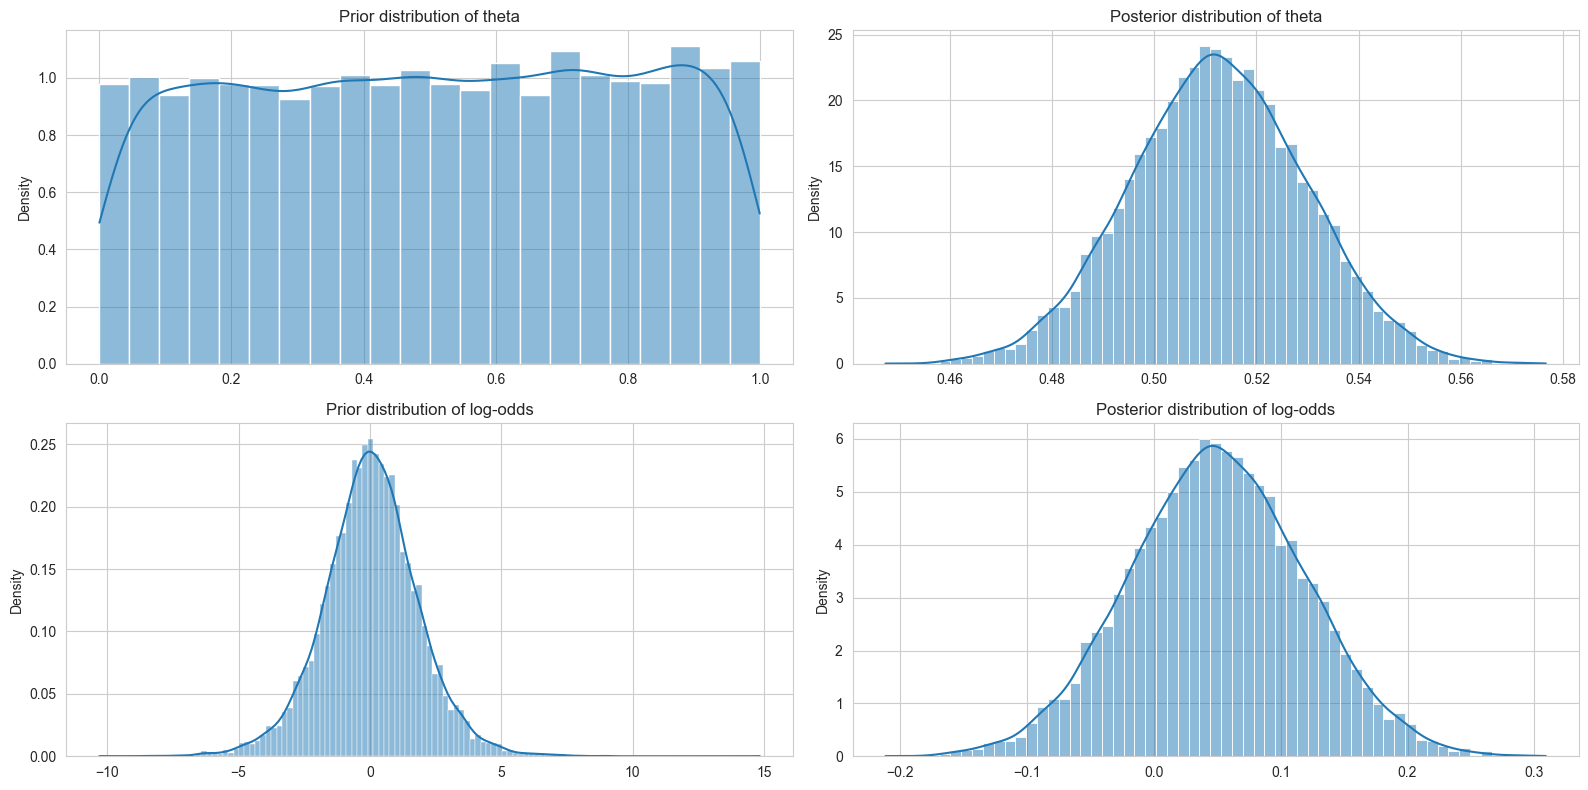

In [59]:
_, log_odds_ax = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(theta_prior_samples, ax=log_odds_ax[0][0], stat='density', kde=True)
log_odds_ax[0][0].set_title('Prior distribution of theta')

sns.histplot(theta_posterior_samples, ax=log_odds_ax[0][1], stat='density', kde=True)
log_odds_ax[0][1].set_title('Posterior distribution of theta')

sns.histplot(gamma_prior_samples, ax=log_odds_ax[1][0], stat='density', kde=True)
log_odds_ax[1][0].set_title('Prior distribution of log-odds')

sns.histplot(gamma_posterior_samples, ax=log_odds_ax[1][1], stat='density', kde=True)
log_odds_ax[1][1].set_title('Posterior distribution of log-odds')

plt.tight_layout()
plt.show()

#### Example: Functions of two parameters

Based on the prior distributions and the data in the birthrate example, the posterior distributions for the two educational groups are:

${\theta_{1} | y_{1,1},...,y_{n1,1}} \sim gamma(219, 112)$ (women without bachelor's degree)
${\theta_{2} | y_{1,2},...,y_{n2,1}} \sim gamma(68, 45)$ (women with bachelor's degree)

There are a variety of ways to describe our knowledge about the difference between $\theta_{1}$ and $\theta_{2}$. For example, we may be interested in the numerical value of $Pr(\theta_{1} > \theta_{2} | Y_{1,1}=y_{1,1},...,Y_{n2,2}=y_{n2,2})$, or in the posterior distribution of $\theta_{1}/\theta_{2}$. Both of these qunatities can be obtained with Monte Carlo sampling:

sample $\theta_{1}^{(1)} \sim p(\theta_{1}| \sum_{i=1}^{111} Y_{i,1} = 217)$, sample $\theta_{2}^{(1)} \sim p(\theta_{2}|\sum_{i=1}^{44} Y_{i,2}=66)$

sample $\theta_{1}^{(2)} \sim p(\theta_{1}| \sum_{i=1}^{111} Y_{i,1} = 217)$, sample $\theta_{2}^{(2)} \sim p(\theta_{2}|\sum_{i=1}^{44} Y_{i,2}=66)$
.
.
.
sample $\theta_{1}^{(S)} \sim p(\theta_{1}| \sum_{i=1}^{111} Y_{i,1} = 217)$, sample $\theta_{2}^{(S)} \sim p(\theta_{2}|\sum_{i=1}^{44} Y_{i,2}=66)$


The sequence ${(\theta_{1}^{(1)}, \theta_{2}^{(1)}),...,(\theta_{1}^{(S)}, \theta_{2}^{(S)})}$ consists of S independent samples from the joint posterior distribution of $\theta_{1}$ and $\theta_{2}$, and can be used to make Monte Carlo approximations to posterior quantities of interest. For exampl, $Pr(\theta_{1} > \theta_{2}| \sum_{i=1}^{111} Y_{i,1} = 217, \sum_{i=1}^{44} Y_{i,2} = 66)$ is approximated by $\frac{1}{S} \sum_{s=1}^{S} I(\theta_{1}^{(s)} > \theta_{2}^{(s)})$.

In [62]:
a, b = 2, 1
sy1, n1, sy2, n2 = 217, 111, 66, 44

theta_1_samples = gamma_distribution(a+sy1, b+n1).sample(10000)
theta_2_samples = gamma_distribution(a+sy2, b+n2).sample(10000)

print(f"Pr(theta_1 > theta_2) = {tf.reduce_mean(tf.cast(theta_1_samples > theta_2_samples, tf.float32))}")

Pr(theta_1 > theta_2) = 0.9740999937057495


Additionally, if we were interested in the ratio of the means of the two groups, we could use the empirical distribution of ${\theta_{1}^{(1)}/\theta_{2}^{(1)}, ..., \theta_{1}^{(S)}/\theta_{2}^{(S)}}$

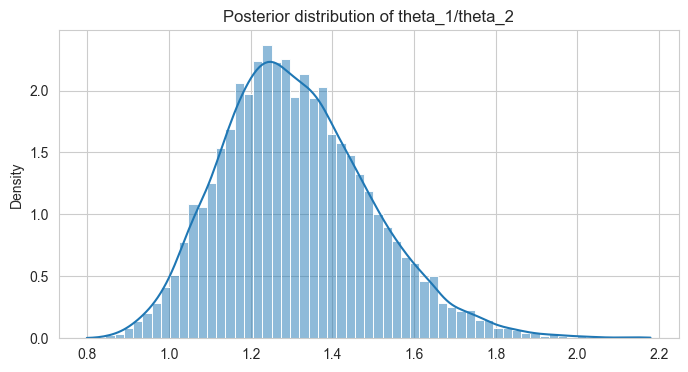

In [72]:
gamma_ratio_samples = theta_1_samples/theta_2_samples

_, gamma_ratio_ax = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(gamma_ratio_samples, stat='density', kde=True, ax=gamma_ratio_ax)
gamma_ratio_ax.set_title('Posterior distribution of theta_1/theta_2')

plt.show()

## Sampling from predictive distributions

The predictive distribution of a random variable $\widetilde{Y}$ is a probability distribution for $\widetilde{Y}$ such that
- known quantities have been conditioned on;
- unknown quantities have been integrated out.

For example, let $\widetilde{Y}$ be the number of children of a person who is sampled from the population of women aged 40 with a college degree. If we knew the true mean birthrate $\theta$ of this population, we might describe our uncertainty about $\widetilde{Y}$ with a Poisson($\theta$) distribution:

Sampling model: $Pr(\widetilde{Y}|\theta) = p(\widetilde{y}|\theta) = \theta^{\widetilde{y}}e^{-\theta} / \widetilde{y}!$

We cannot make predictions from this model, however, because we do not actually know $\theta$. If we did not have any sample data from the population, our predictive distribution would be obtained by integrating out $\theta$:

Predictive model: $Pr(\widetilde{Y}=\widetilde{y}) = \int p(\widetilde{y}|\theta)p(\theta)d\theta$
In the case where $\theta \sim gamma(a,b)$, we showed in the last chapter that this predictive distribution is the negative binomial(a,b) distribution. A predictive distribution that integrates over unknown parameters but is not conditional on observed data is called a **prior predictive distribution**. Such a distribuion can be useful in evaluating if a prior distribution for $\theta$ actually translates into reasonable prior beliefs for observable data $\widetilde{Y}$. After we have observed a sample $Y_{1},...,Y_{n}$ from the population, the relevant predictive distribution for a new observation becomes

$Pr(\widetilde{Y}=\widetilde{y}|Y_{1}=y{1},...,Y_{n}=y_{n}) = \int p(\widetilde{y}|\theta, y_{1},...,y_{n})p(\theta|y_{1},...,y_{n})d\theta=\int p(\widetilde{y}|\theta)p(\theta|y_{1},...,y_{n})d\theta$

This is called a **posterior predictive distribution**, because it conditions on an observed dataset. In the case of a Poisson model with a gamma prior distribution the posterior predictive distribution is negative binomial(a+$\sum y_{i}$, b+n).

In many modeling situations, we will be able to sample from $p(\theta | y_{1},...,y_{n})$ and $p(y|\theta)$, but $p(\widetilde{y}|y_{1},...,y_{n})$ will be too complicated to sample from directly. In this situation we can sample from the posterior predictive distribution indirectly using a Monte Carlo procedure. Since $p(\widetilde{y}|y_{1},...,y_{n})=\int p(\widetilde{y}|\theta)p(\theta|y_{1},...,y_{n})d\theta$ we see that $p(\widetilde{y}|y_{1},...,y_{n})$ is the posterior expecation of $p(\widetilde{y}|\theta)$. To obtain the posterior predictive probability that $\widetilde{Y}$ is equal to some specific value $\widetilde{y}$, we could just apply the Monte Carlo method of the previous section: Sample $\theta^{1},...,\theta^{S} \sim p(\theta|y_{1},...,y_{n})$ and then approximate $p(\widetilde{y}|y_{1},...,y_{n})$ with $\sum_{s=1}^{S} p(\widetilde{y}|\theta^{(s))}) / S$. This procedure will work well if $p(y|\theta)$ is discrete and we are interested in quantities that are easily computed from $p(y|\theta)$. However, it will generally be useful to have a set of samples of $\widetilde{Y}$ from its posterior predictive distribution. Obtaining these samples can be done quite easily as follows:

 sample $\theta^{(1)} \sim p(\theta|y_{1},...,y_{n})$, sample $\widetilde{y}^{(1)} \sim p(\widetilde{y}|\theta^{(1)})$
 sample $\theta^{(2)} \sim p(\theta|y_{1},...,y_{n})$, sample $\widetilde{y}^{(2)} \sim p(\widetilde{y}|\theta^{(2)})$
 ...
 sample $\theta^{(S)} \sim p(\theta|y_{1},...,y_{n})$, sample $\widetilde{y}^{(1)} \sim p(\widetilde{y}|\theta^{(S)})$

The sequence {$(\theta, \widetilde{y})^{(1)}, ... , (\theta, \widetilde{y})^{(S)}$} constitutes S independent samples from the joint posterior distribution of $(\theta, \widetilde{Y})$, and the sequence ${ {\widetilde{y}^{(1)}}, ... ,{\widetilde{y}^{(S)}} }$ constitutes S independent samples from the **marginal** posterior distribution of $\widetilde{Y}$, which is the posterior predictive distribution.

#### Example: Poisson model

At the end of Chapter 3 it was reported that the predictive probability that an age-40 women without a college degree would have more children than an age-40 women with a degree was 0.48. To arrive at this answer excatly we would have to do the following doubly infinite sum:

$ Pr(\widetilde{Y_{1}} > \widetilde{Y_{2}} | \sum Y_{i,1} = 217, \sum Y_{i,2} = 66) = \sum_{\widetilde{y_{2}}=0}^{\infty} dnbinom(\widetilde_{y_{1}}, 219, 112) dnbinom(\widetilde_{y_{2}}, 68, 45)$

Alternatively, this sum can be approximated with Monte Carlo sampling. Since $\widetilde{Y_{1}}$ and $\widetilde{Y_{2}}$ are a posteriori independent, samples from their joint posterior distribution can be made by sampling values of each variable separately from their individual posterior distributions. Posterior predictive samples from the conjugate Poisson model can be generated as follows:

sample $\theta^{(1)} \sim gamma(a + \sum y_{i}, b+n)$, sample $\widetilde{y^{1}} \sim Poisson(\theta^{(1)})$
sample $\theta^{(2)} \sim gamma(a + \sum y_{i}, b+n)$, sample $\widetilde{y^{2}} \sim Poisson(\theta^{(2)})$
...
sample $\theta^{(S)} \sim gamma(a + \sum y_{i}, b+n)$, sample $\widetilde{y^{S}} \sim Poisson(\theta^{(S)})$

Monte Carlo samples from the posterior predictive distribution of our two educational groups can be obtained with following code:

In [75]:
def poisson_distribution(t_):
    return tfd.Poisson(rate=t_)

a, b = 2, 1
sy1, n1 = 217, 111
sy2, n2 = 66, 44

theta_1_samples = gamma_distribution(a+sy1, b+n1).sample(10000)
theta_2_samples = gamma_distribution(a+sy2, b+n2).sample(10000)

y1_tilda_samples = poisson_distribution(theta_1_samples).sample(10000)
y2_tilda_samples = poisson_distribution(theta_2_samples).sample(10000)

In [79]:
print(f"Pr(Y1 > Y2) = {tf.reduce_mean(tf.cast(y1_tilda_samples > y2_tilda_samples, tf.float32))}")

Pr(Y1 > Y2) = 0.482304185628891
